In [83]:
import face_recognition
import cv2
from PIL import Image, ImageDraw
from IPython.display import display

face_image = face_recognition.load_image_file("data/shunyuan_train.png")
face_encodings = face_recognition.face_encodings(face_image)[0]


In [84]:
face_locations = face_recognition.face_locations(face_image)
face_locations

[(418, 911, 973, 356)]

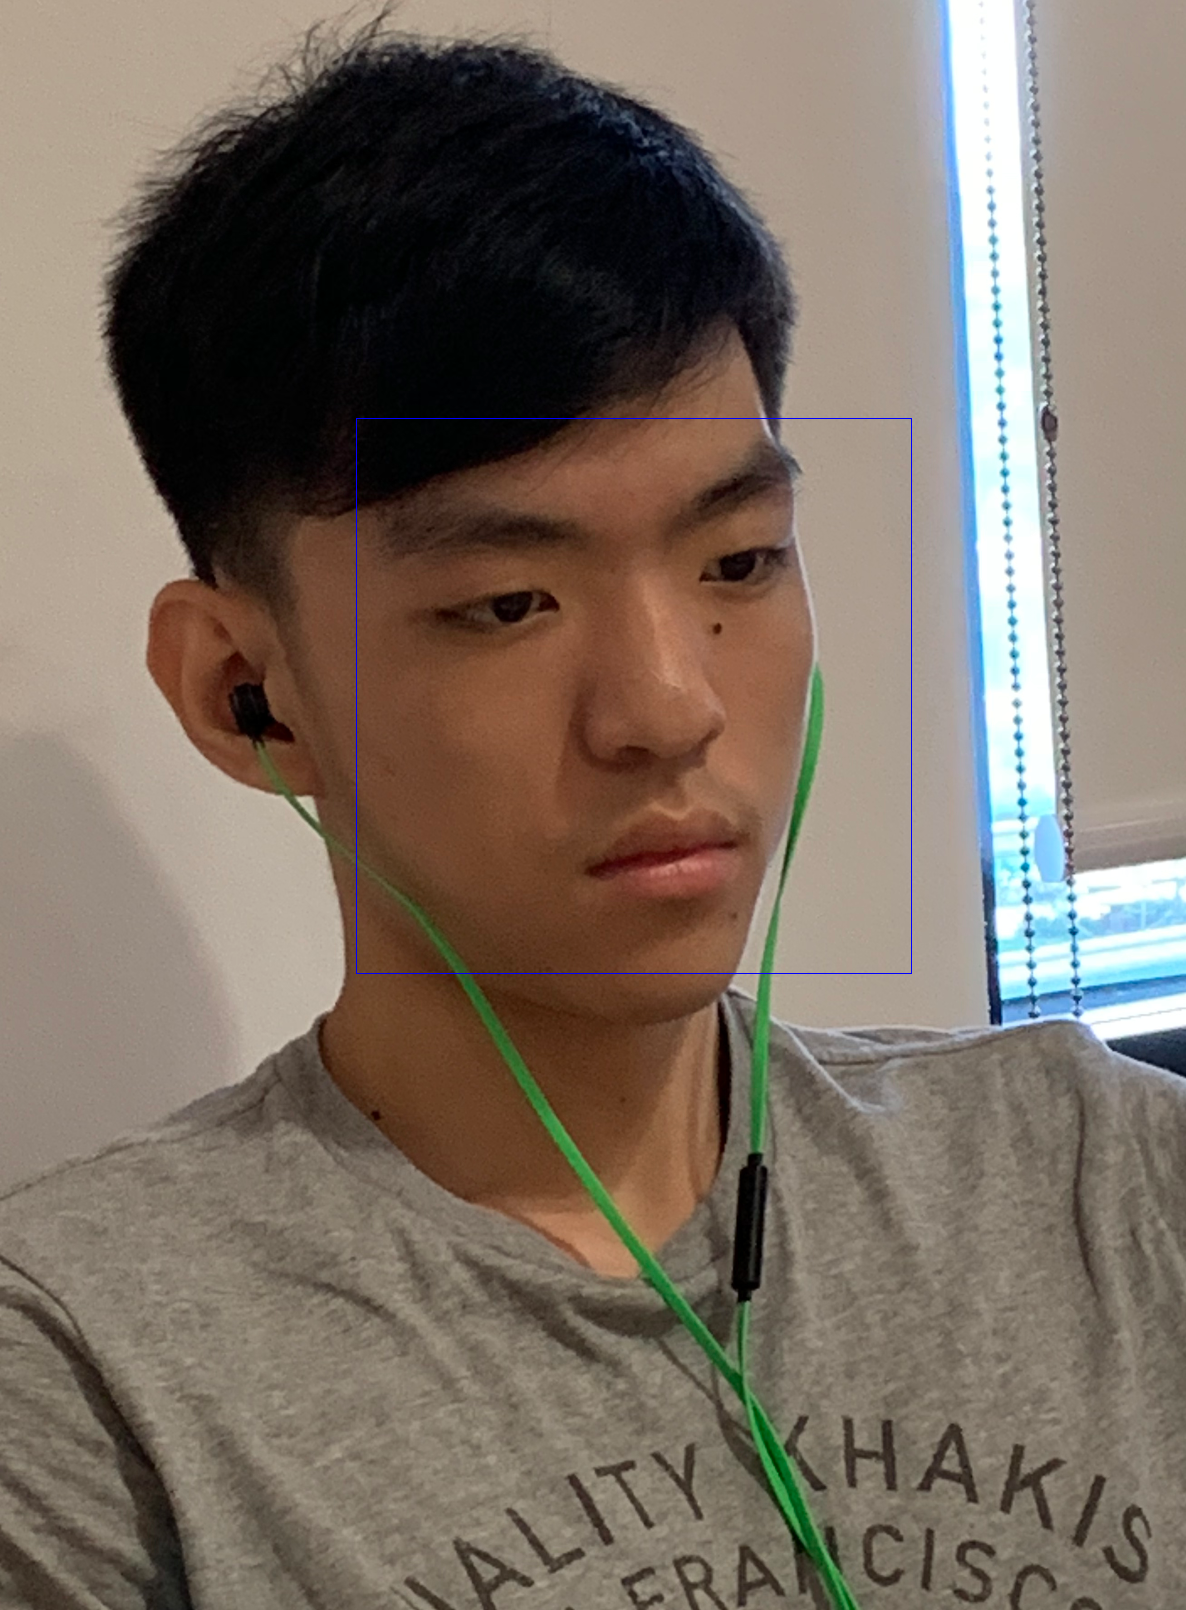

In [85]:
pil_image = Image.fromarray(face_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left) in face_locations:
   draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

del draw

display(pil_image)
 

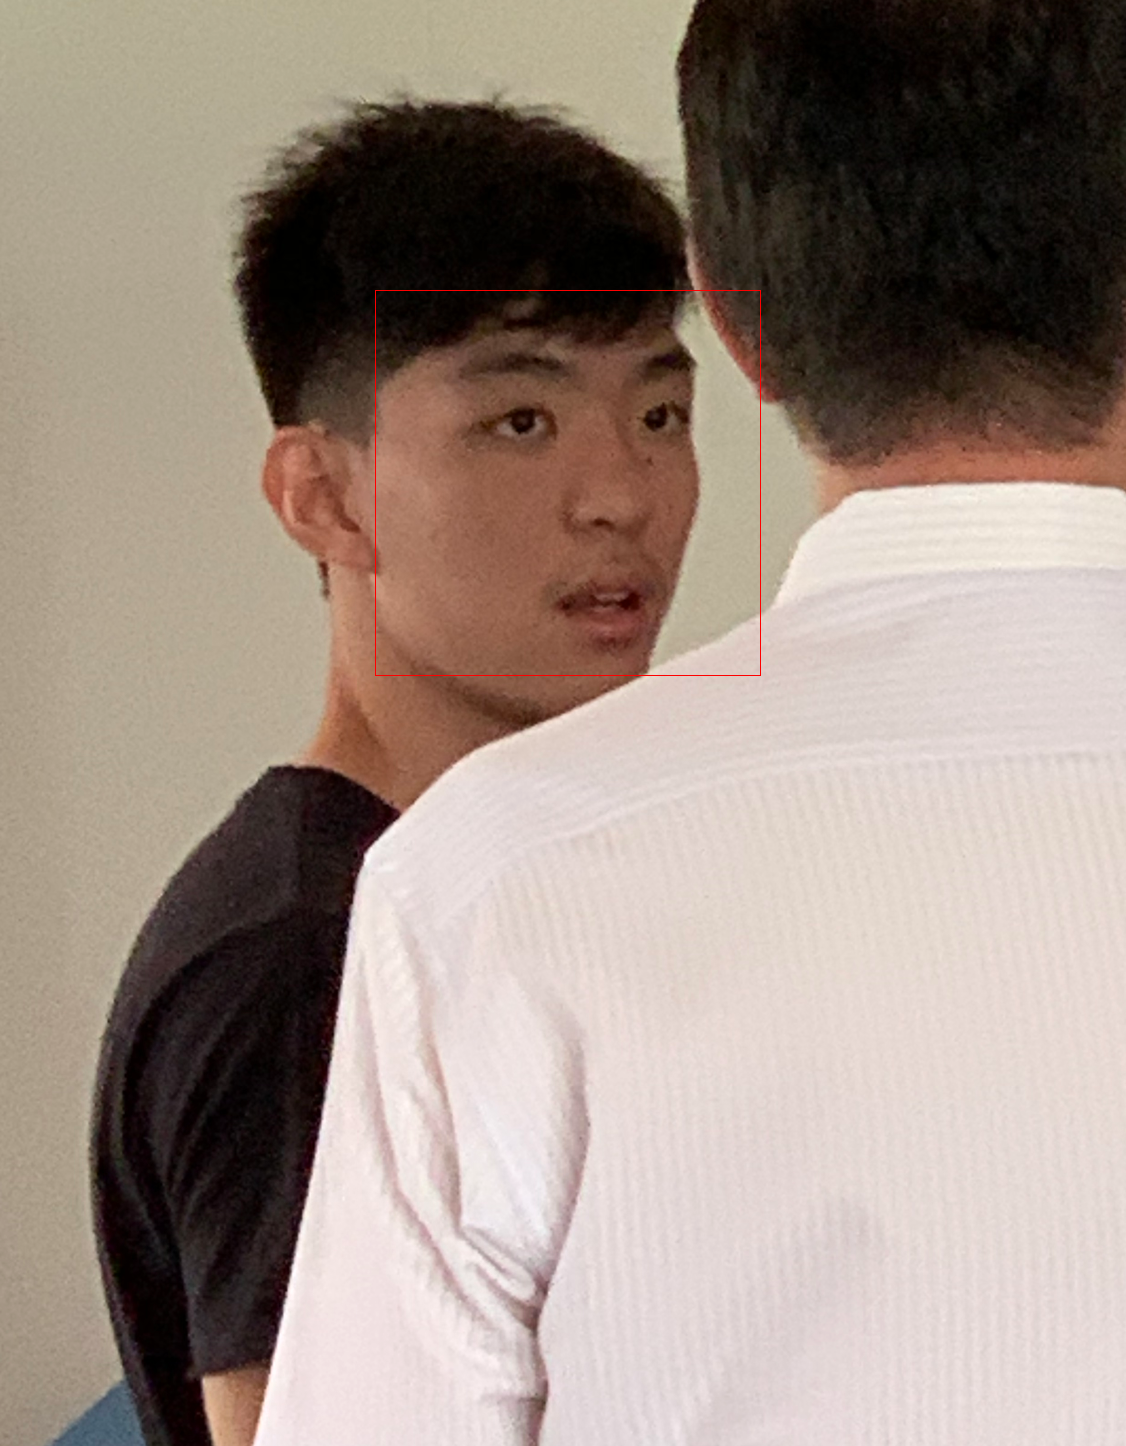

In [63]:
match_image = face_recognition.load_image_file("data/shunyuan_match.png")
match_faces = face_recognition.face_locations(match_image)
match_encodings = face_recognition.face_encodings(match_image, match_faces)

pil_image = Image.fromarray(match_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left) in match_faces:
    draw.rectangle(((left, top), (right, bottom)), outline=(255, 0, 0))
    
del draw

display(pil_image)


In [82]:
for match_encoding in match_encodings:
    is_match = face_recognition.compare_faces([face_encodings], match_encoding)
    dist = face_recognition.face_distance([face_encodings], match_encoding)
    print(f'{"👍Matched" if is_match else "Did not match any"} face with distance: {dist[0]}')

👍Matched face with distance: 0.32182008205575197
